<a href="https://colab.research.google.com/github/m123m12/Rental-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name: Seoul_Bike_Sharing_Demand_Prediction**

**Problem Description:**

**Currently rental bikes are introduced in  many urban cities for the enhancement of moblity comfort.** **It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.** **Eventually,providing the city with a stable supply of rental bikes becomes a major concern.** **The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

**Business objective:**

**Because rental bike sharing is growing,so availability of bike at right time is really important for companies.** **In this project I have data set of seoul city.**  **The data set contain information like weather condition,holiday,date,number of rented bike count,hours.** **Based on this data I have to predict bikes count at each hour for the stable supply of rental bikes.**

**Data Description:**

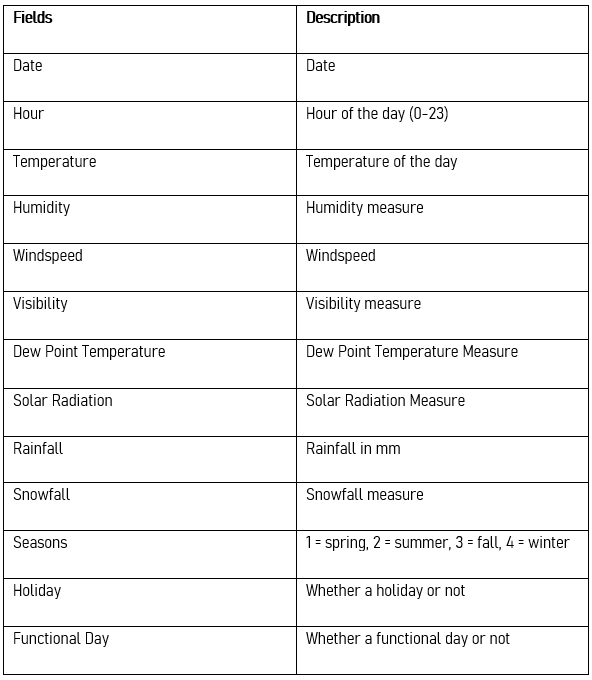

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#mounting Google drive


In [3]:
#loading the dataset
bikedata=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='latin')

In [4]:
#here we copy the dataframe to other instance to ensure efficiency if there is a need of change.
bikedata1=bikedata.copy()

In [5]:
#check the details of the data set
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
#check the description of the data set
bikedata.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
#check the first five rows of a data set
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
#check the last five rows of adata set
bikedata.tail()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
#check the shape of the data set
bikedata.shape

(8760, 14)

In [10]:
#check the data types
bikedata.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [11]:
#check null values in each column
bikedata.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [12]:
#check the duplicate values in data set
len(bikedata[bikedata.duplicated()])

0

There is no null values and no duplicated values in given data set.

In [13]:
bikedata.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

 **convert 'Date' column from object datatype to datetime datatype**

In [14]:
bikedata['Date'] = pd.to_datetime(bikedata['Date'])

**Extracting the Date,Month and Year from Date column:**

In [15]:
bikedata['Day'] = bikedata['Date'].dt.day
bikedata['Month'] = bikedata['Date'].dt.month
bikedata['Year'] = bikedata['Date'].dt.year
bikedata['Weekday'] = bikedata['Date'].dt.day_name()

     

In [16]:
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [17]:
#Drop the Date column
bikedata=bikedata.drop('Date',axis=1)

In [18]:
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


**Exploratory Data Analysis:**

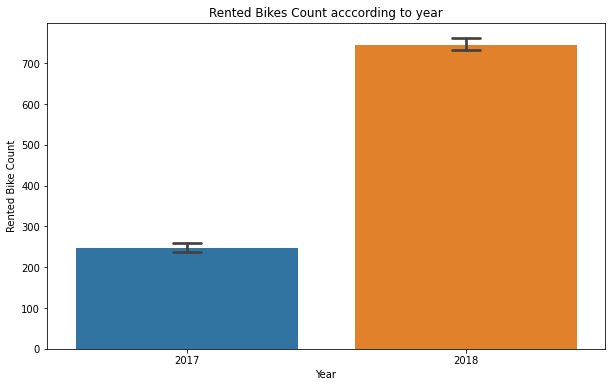

In [19]:
#Analysis of Rental bikes according to year
fig,ax=plt.subplots(figsize=(10,6))
sns.set_style("dark")
sns.barplot(data=bikedata,x='Year',y='Rented Bike Count',ax=ax,capsize=.1)
ax.set(title='Rented Bikes Count acccording to year')
plt.show()


The people used rental bikes highly in year 2018 as compared to the year 2017.

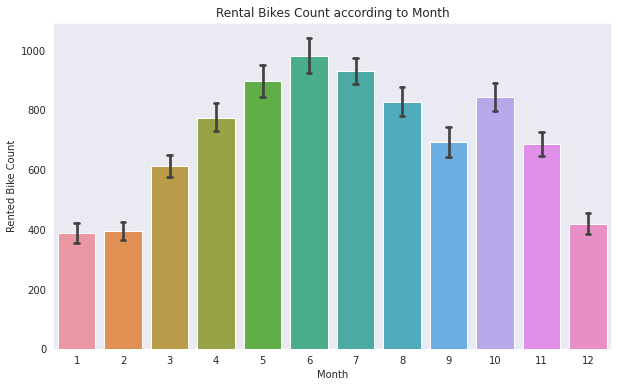

In [20]:
#Analysis of rental bikes according to month
fig,ax=plt.subplots(figsize=(10,6))
sns.set_style('ticks')
sns.barplot(data=bikedata,x='Month',y='Rented Bike Count',ax=ax,capsize=.1)
ax.set(title='Rental Bikes Count according to Month')
plt.show()

The usage of Rental bikes highly between 5 to 10 months as compared to the other months.

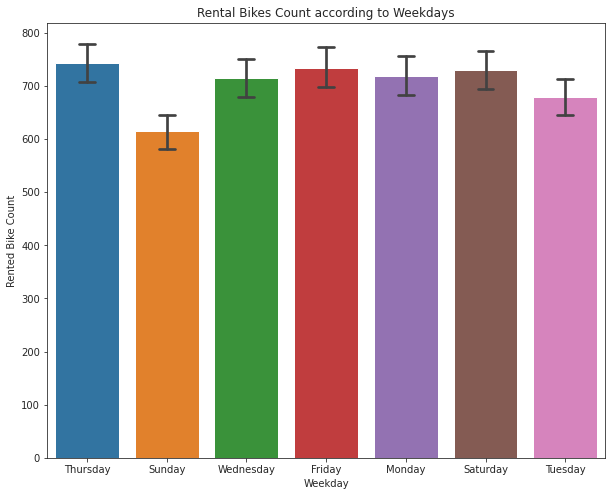

In [21]:
#Analysis of Rental bikes according to Weekdays
fig,ax=plt.subplots(figsize=(10,8))
sns.set_style("white")
sns.barplot(data=bikedata,x='Weekday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Rental Bikes Count according to Weekdays')
plt.show()

The people who use rental bikes are decreased on Sunday as compared to the other days.

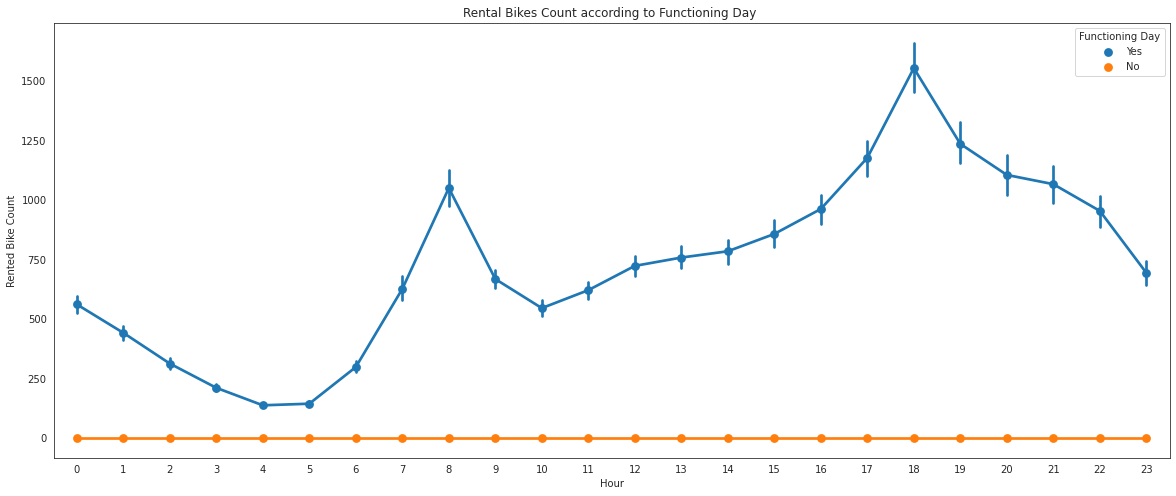

In [22]:
#Analysis of Rental bikes according to Functioning days
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=bikedata,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Rental Bikes Count according to Functioning Day ')
plt.show()

There is no rental bikes count on non Functioning Day.

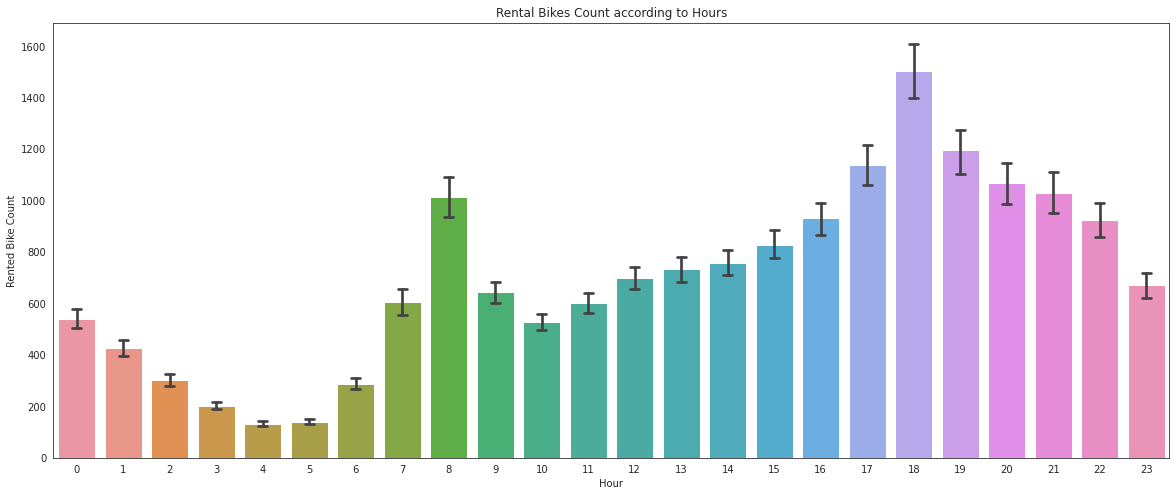

In [23]:
#Analysis of Rental bikes according to Hours
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("dark")
sns.barplot(data=bikedata,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Rental Bikes Count according to Hours')
plt.show()

The people use rental bikes highly between 7 A.M to 9 A.M and 5 P.M to 9 P.M

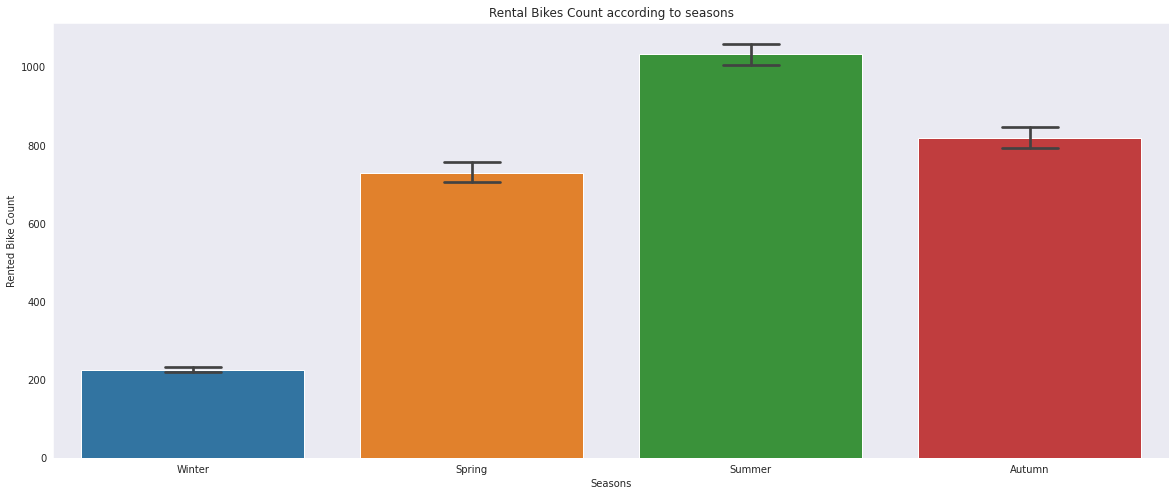

In [24]:
#Analysis of Rental bikes according to seasons
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("dark")
sns.barplot(data=bikedata,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Rental Bikes Count according to seasons')
plt.show()

Rental bikes count is maximum in Summer and minimum in Winter.

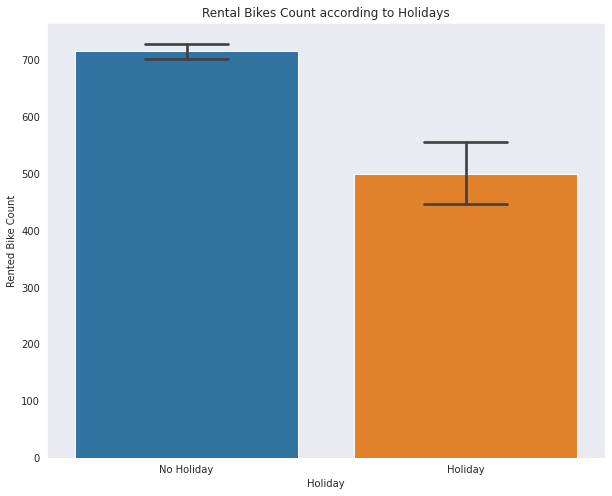

In [25]:
#Analysis of rental bikes accordint to Holidays
fig,ax=plt.subplots(figsize=(10,8))
sns.set_style("white")
sns.barplot(data=bikedata,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.3)
ax.set(title='Rental Bikes Count according to Holidays')
plt.show()

The people use rental bikes minimum on holidays as compared to the working days.

**Feature Engineering:**

In [26]:
bikedata.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

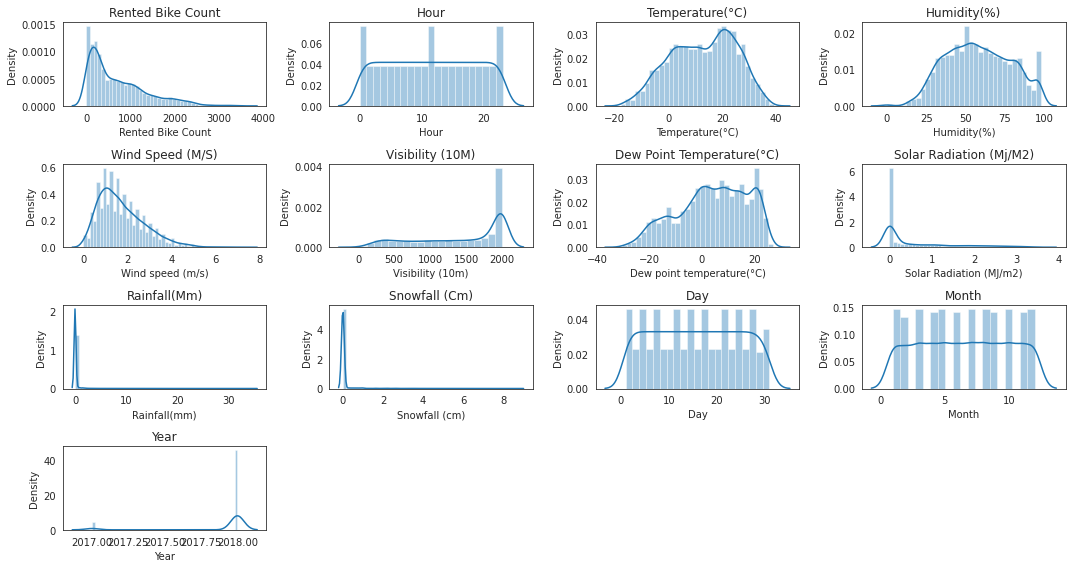

In [27]:
#visualizing the distribution of columns
plt.figure(figsize=(15,8))
for n, column in enumerate(bikedata.describe().columns):
  plt.subplot(4, 4, n+1)
  sns.distplot(bikedata[column])
  plt.title(f'{column.title()}')
  plt.tight_layout()

From the above analysis I observe that Rented Bike Count,Wind Speed,Visibility,Solar Radiation,Rainfall and Snowfall features are not normally distributed.

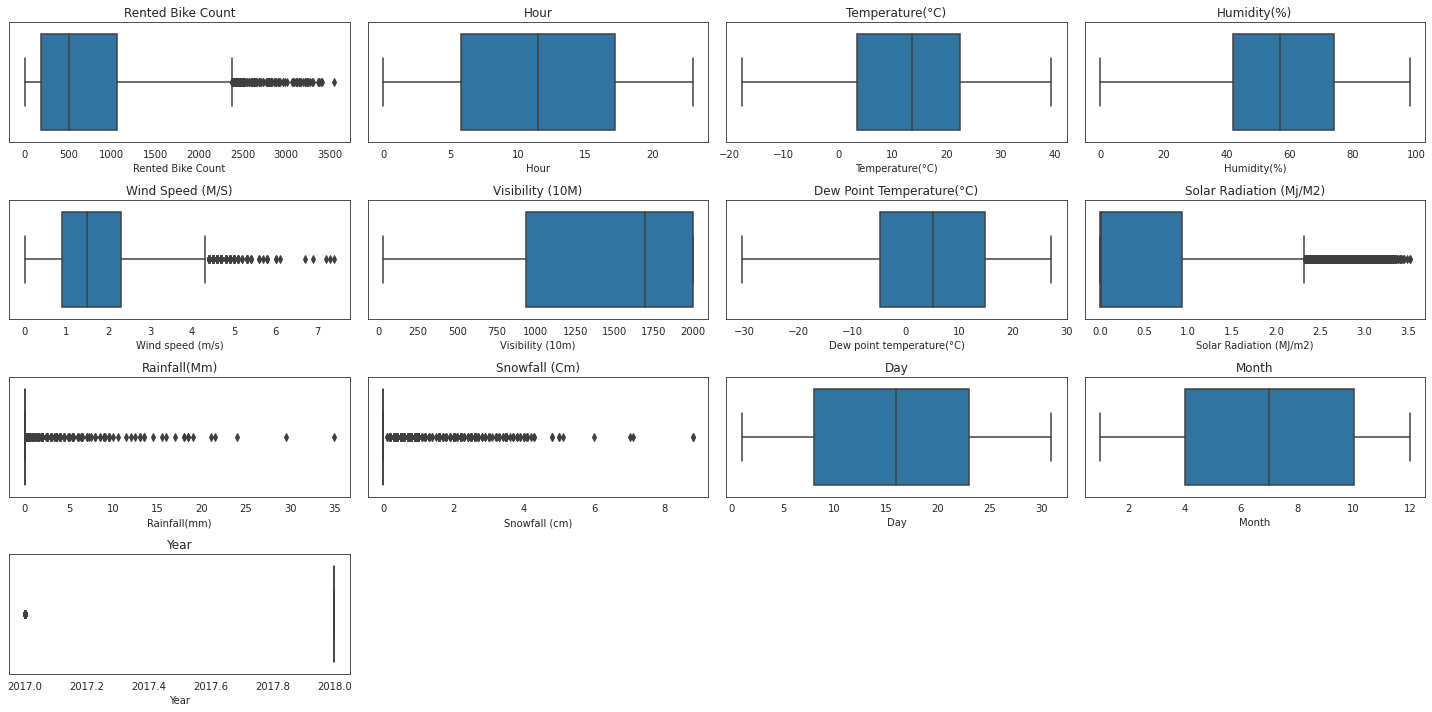

In [28]:
# Visiualizing with boxplot  to find outliers in  dataset
plt.figure(figsize=(20,10))
for n, column in enumerate(bikedata.describe().columns):
  plt.subplot(4, 4, n+1)
  sns.boxplot(bikedata[column])
  plt.title(f'{column.title()}')
  plt.tight_layout()

The range of outliers is low.If we treat outliers may effect our model prediction.

**Regression**

In [29]:
numeric_features=[ 'Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']



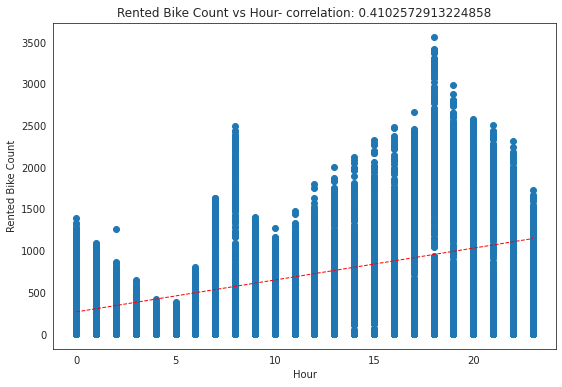

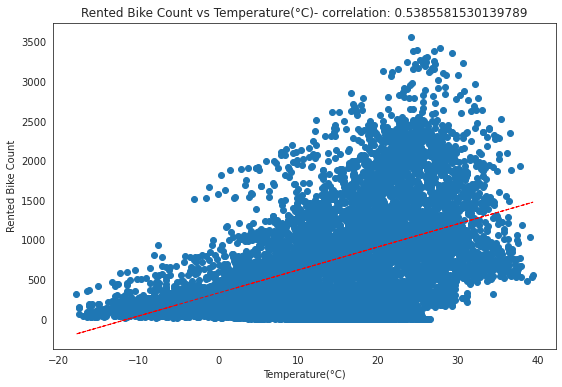

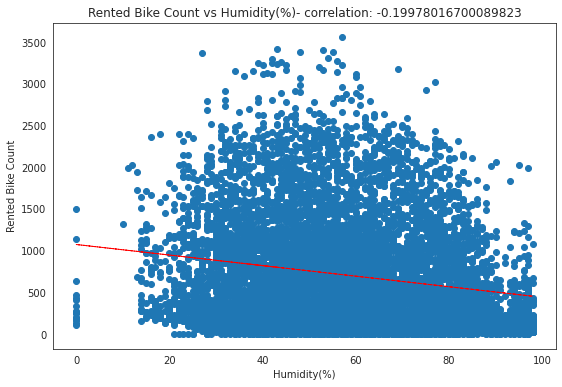

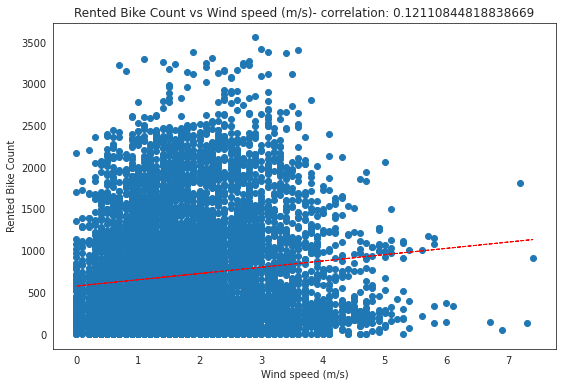

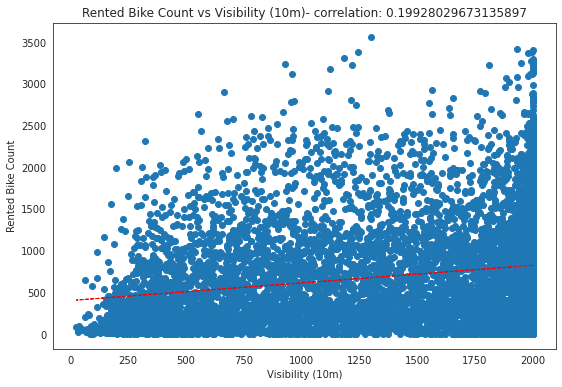

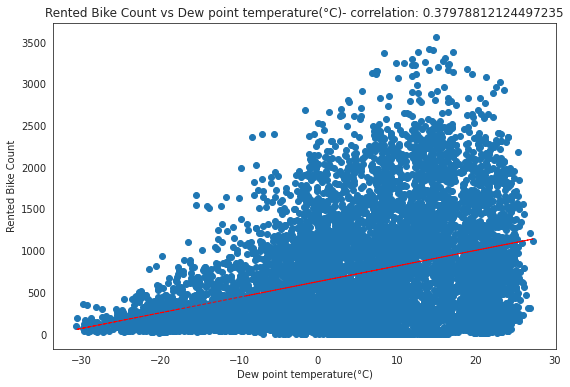

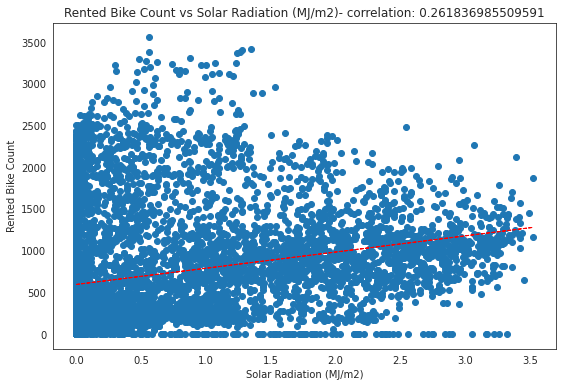

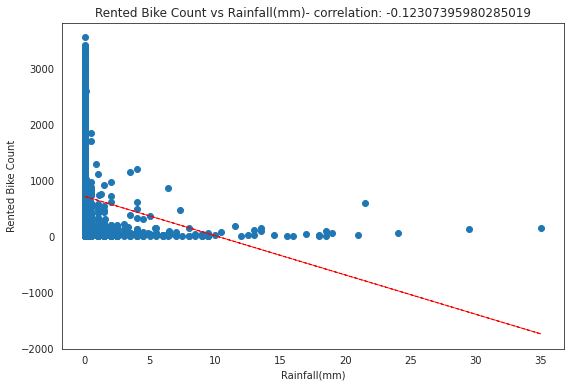

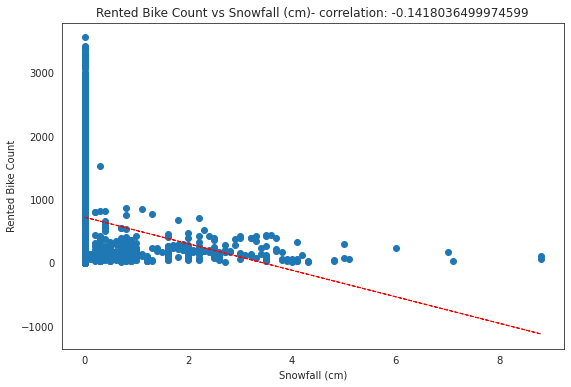

In [30]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bikedata[col]
    label = bikedata['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bikedata[col], bikedata['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(bikedata[col])
    plt.plot(bikedata[col], y_hat, "r--", lw=1)
plt.show()


By above analysis I observe that 

1.If there is increase in temparature the count of rental    bikes is increasing.

2.More number of bikes are rented if there is low humidity.




**Convertion of object data type to int data type:**

In [31]:
#change the data type of Holiday and Functioning Day from object type to int type
bikedata['Holiday'] = bikedata['Holiday'].map({'No Holiday' : 0, 'Holiday' : 1})
bikedata['Functioning Day'] = bikedata['Functioning Day'].map({'No' : 0, 'Yes' : 1})
     

In [32]:
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday


In [33]:
bikedata.shape

(8760, 17)

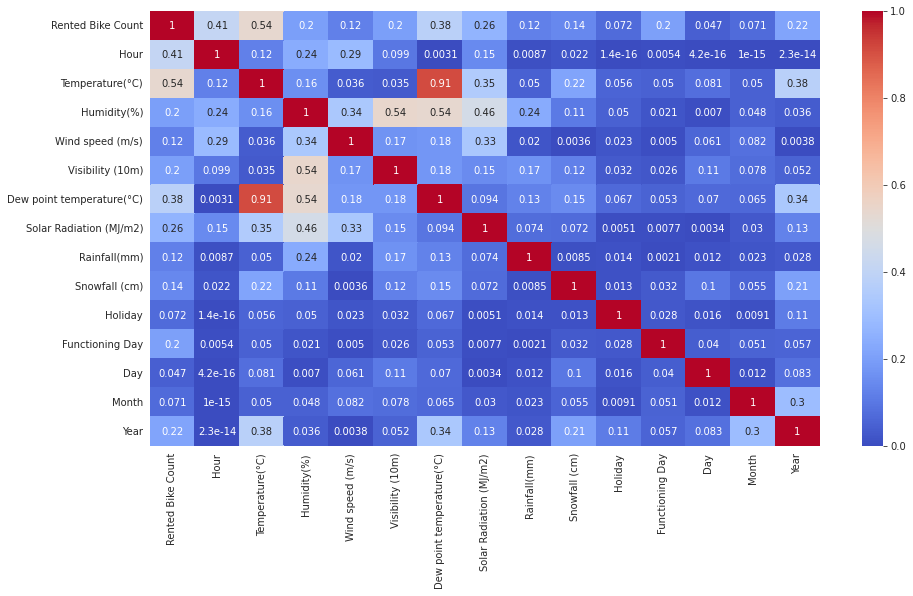

In [34]:
 #check the correlation between columns
plt.figure(figsize=(15,8))
correlation = bikedata.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

From the above map I observe that Dew point temperature is highly correlated with temperature.So I drop the Dew point temperature column.

In [35]:
#drop the Dew point temperature(°C)
bikedata.drop('Dew point temperature(°C)', inplace = True, axis = 1)


In [36]:
#Making copy of our dataset for any upgrade in future
bikedata2=bikedata.copy()
     

**Variation Inflation Factor:**

VIF is a measure of the correlation between multiple independent variables in a multiple regression analysis.It is used to determine which independent variables are having a greater effect on the model and which ones can be removed to improve the model's accuracy.VIF should be less than 5 so that variables are less correlated.

   

In [37]:
#importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [38]:
bikedata.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day',
       'Month', 'Year'],
      dtype='object')

In [39]:
# Check VIF for each numerical variable
numerical_features=['Temperature(°C)','Hour', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday']

calc_vif(bikedata[[i for i in numerical_features]])
     

,variables,VIF
0,Temperature(°C),3.238208
1,Hour,3.922387
2,Humidity(%),4.878319
3,Wind speed (m/s),4.610685
4,Visibility (10m),4.730979
5,Solar Radiation (MJ/m2),2.247281
6,Rainfall(mm),1.079201
7,Snowfall (cm),1.121043
8,Holiday,1.055235


In [40]:
#update the dataset for our model prediction
bikedata=bikedata[numerical_features+['Rented Bike Count']]

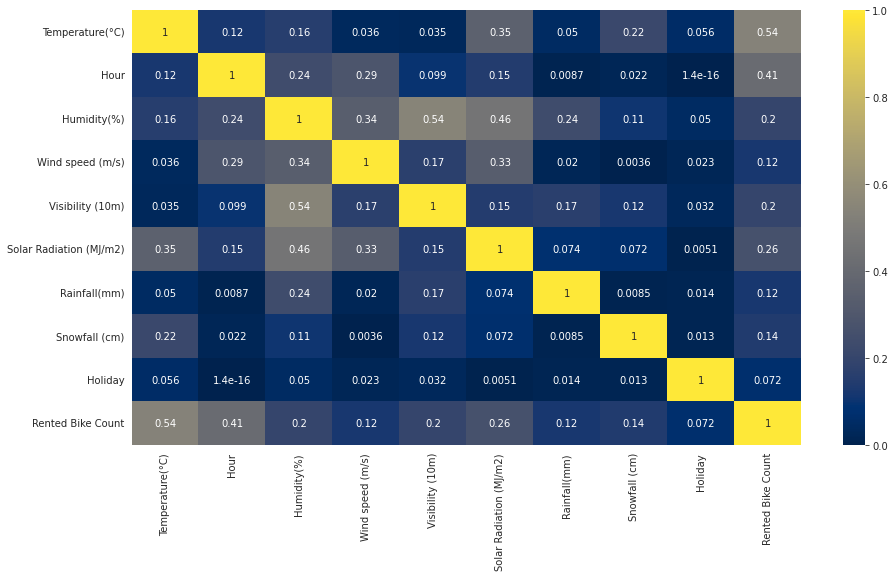

In [41]:
#check the correlation
plt.figure(figsize=(15,8))
correlation = bikedata.corr()
sns.heatmap(abs(correlation), annot=True, cmap='cividis')

In [42]:
bikedata.head()

,Temperature(°C),Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Rented Bike Count
0,-5.2,0,37,2.2,2000,0.0,0.0,0.0,0,254
1,-5.5,1,38,0.8,2000,0.0,0.0,0.0,0,204
2,-6.0,2,39,1.0,2000,0.0,0.0,0.0,0,173
3,-6.2,3,40,0.9,2000,0.0,0.0,0.0,0,107
4,-6.0,4,36,2.3,2000,0.0,0.0,0.0,0,78


In [45]:
bikedata = pd.get_dummies(bikedata2, columns = ['Seasons', 'Year', 'Weekday'])
bikedata
     

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Seasons_Winter,Year_2017,Year_2018,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0


**TRAINING THE MODEL:**

In [46]:
#import the required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [54]:
# splitting the data
#independent variables
X = bikedata.drop(columns = ['Rented Bike Count'] , axis = 1)
#dependent variables
y=bikedata['Rented Bike Count']
# Because of skewness we will convert it into normal distribution for linear regression.
y1 = np.sqrt(bikedata['Rented Bike Count'])
     

In [57]:
# Train test spliting
X_train,X_test,y_train,y_test = train_test_split(X,y1 ,test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 25)
(1752, 25)


In [58]:
#Scaling the independent variables for standardization
standardscalar=StandardScaler()
X_train=standardscalar.fit_transform(X_train)
X_test=standardscalar.transform(X_test)

In [59]:
# Implementing Linear Regression

reg = LinearRegression().fit(X_train,y_train)

In [61]:
#check the coefficient
reg.coef_

array([ 3.37756260e+00,  5.66991897e+00, -3.32328979e+00,  1.13804790e-01,
        1.27005047e-01, -7.58233843e-01, -1.68919800e+00, -7.95485468e-03,
       -6.68171531e-01,  4.99742929e+00, -9.12987010e-02, -3.87286092e-02,
       -1.55192885e+11, -1.54959082e+11, -1.55017666e+11, -1.53949394e+11,
       -7.46268582e+11, -7.46268582e+11,  4.42479047e+12,  4.45177630e+12,
        4.51416834e+12,  4.52533275e+12,  4.51416834e+12,  4.53459497e+12,
        4.55484042e+12])